<a href="https://colab.research.google.com/github/FlaviaNdr/Python_Projects/blob/main/ArrestDataNYC2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of arrest data in NYC 2022**
The Dataset includes all crimes reported to NYPD in the last 6 months. The dataset can be found at NYC OpenData website (https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc)

# 1.Import Libraries and Data

In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Import Dataset')
df = pd.read_csv('https://raw.githubusercontent.com/FlaviaNdr/Python_Projects/main/NYPD_Arrest_Data__Year_to_Date_.csv')

# 2.Data exploration and cleaning

2.1 Checking the data

In [29]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,01/06/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,01/08/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)


In [30]:
df.shape # check the number of columns and rows

(93238, 19)

In [31]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [32]:
# check and drop duplicate data 
df = df.drop_duplicates()
df.shape    # no duplicates found

(93238, 19)

In [33]:
# check missing values
df.isnull().values.any()

True

In [34]:
df.isna().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                       233
PD_DESC                       0
KY_CD                       304
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  911
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

2.2 Dealing with missing data

In additon to NaN values there are also (null) values. I`m replacing them with NaN. I will drop missing values for columns that are not important, and for the others i will fill them with "UNKNOWN". There is some numeric data ('9') on LAW_CAT_CD, will replace them with "UNKNOWN". Drop non important columns and rename Boroughs

In [35]:
df.replace('(null)', np.NaN, inplace=True)
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238552639,01/03/2022,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,01/05/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,01/06/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,01/08/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,01/12/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93233,245643921,05/25/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,B,40,0,25-44,M,BLACK HISPANIC,1006851,233366,40.807184,-73.918356,POINT (-73.918356 40.807184)
93234,244421351,05/01/2022,817.0,TORTURE/INJURE ANIMAL CRUELTY,364.0,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,AM 0353000,M,B,40,2,25-44,M,BLACK,1007208,234859,40.811280,-73.917061,POINT (-73.917061 40.81128)
93235,245240736,05/18/2022,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,M,25,0,45-64,F,WHITE HISPANIC,1000581,231070,40.800896,-73.941011,POINT (-73.941011 40.800896)
93236,246474038,06/11/2022,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 265031B,F,B,40,0,25-44,F,BLACK HISPANIC,1005835,234850,40.811260,-73.922021,POINT (-73.922021 40.81126)


In [36]:
df.isna().sum() # code worked

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                       233
PD_DESC                     304
KY_CD                       304
OFNS_DESC                   304
LAW_CODE                      0
LAW_CAT_CD                  911
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

In [37]:
# dropping rows with NaN values
df.dropna(subset=['PD_CD','KY_CD'],inplace=True)


In [38]:
# dropping not important colums
df.drop(['PD_CD','KY_CD','JURISDICTION_CODE','PD_DESC','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'], axis=1,inplace=True)

In [39]:
# replace NaN values in 'LAW_CAT_CD' with 'UNKNOWN'
df.fillna({'LAW_CAT_CD':'UNKNOWN'},inplace=True)

In [40]:
# replace numeric value '9' in LAW_CAT_CD' with 'UNKNOWN'
df['LAW_CAT_CD'].replace(['9'],'UNKNOWN', inplace=True)

In [41]:
# renaiming Boroughs
df['ARREST_BORO'].replace(['K', 'B', 'M', 'Q', 'S'],['Brooklyn','Bronx','Manhatan','Queens','Staten Island'],inplace=True)

In [42]:
# check clean dataset
df.head()

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,238552639,01/03/2022,CRIMINAL TRESPASS,PL 1401501,M,Brooklyn,75,18-24,M,BLACK
1,238682242,01/05/2022,ROBBERY,PL 160050H,F,Brooklyn,75,25-44,M,BLACK
2,238723993,01/06/2022,RAPE,PL 1302503,F,Brooklyn,77,25-44,M,WHITE
5,239104920,01/13/2022,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Brooklyn,77,45-64,M,BLACK
7,239623520,01/24/2022,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Brooklyn,60,45-64,M,WHITE


# 3. Analysis

3.1 Arrest trend by month

In [43]:
df['ARREST_DATE']=pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DATE'].value_counts()

2022-06-01    746
2022-05-04    744
2022-05-05    735
2022-03-02    723
2022-06-07    716
             ... 
2022-01-02    262
2022-01-28    252
2022-04-17    245
2022-01-30    243
2022-01-29    223
Name: ARREST_DATE, Length: 181, dtype: int64

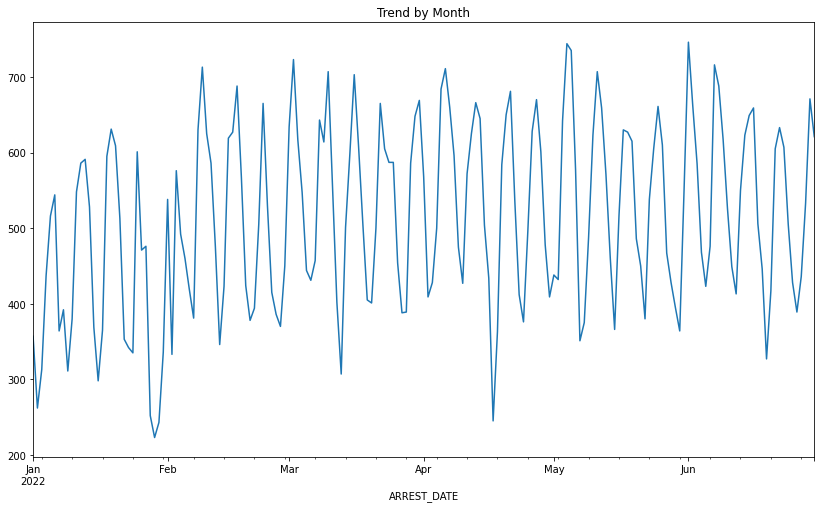

In [44]:
df.groupby(['ARREST_DATE'])['ARREST_KEY'].count().plot(kind='line',title='Trend by Month',figsize=(14,8))

It`s interesting how up and down the data goes.The beginning of May and June have the highest crime rates. 

---



3.2 Types of crimes

From the data and the graph below Assault & Related Offenses is the most popular offense, followed by Petit Larceny and Felony

In [45]:
# top 15 Offenses
df.OFNS_DESC.value_counts().iloc[:15]

ASSAULT 3 & RELATED OFFENSES      15402
PETIT LARCENY                      9944
FELONY ASSAULT                     9128
MISCELLANEOUS PENAL LAW            6187
DANGEROUS DRUGS                    5256
CRIMINAL MISCHIEF & RELATED OF     5192
ROBBERY                            4839
GRAND LARCENY                      4035
DANGEROUS WEAPONS                  3917
BURGLARY                           3171
VEHICLE AND TRAFFIC LAWS           2993
OFFENSES AGAINST PUBLIC ADMINI     2798
OFFENSES INVOLVING FRAUD           2629
SEX CRIMES                         2092
OFF. AGNST PUB ORD SENSBLTY &      2032
Name: OFNS_DESC, dtype: int64

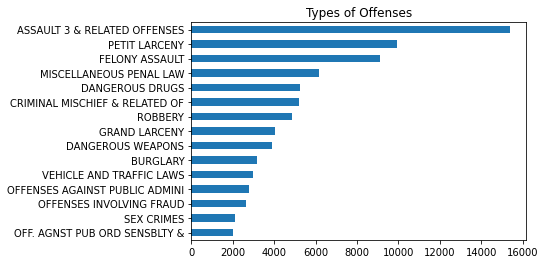

In [46]:
df.OFNS_DESC.value_counts().iloc[:15].sort_values().plot(kind="barh", title = "Types of Offenses")

3.3 Level of offense

54% of offenses were clasified as M=Misdemeanors,
45% as F=Felonies,
the rest V=Violations or Unknown

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cb56cad50>],
      dtype=object)

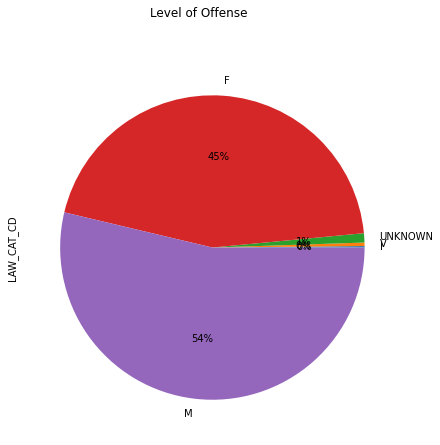

In [47]:
df['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie',subplots=True,figsize=(15,7),autopct='%1.0f%%',title='Level of Offense')

3.4 Crimes by Borough and Race

Brooklyn has the highest number of arrests overall, followed by Manhattan,Bronx,Queens and Staten Island. 
In general,Black and White people are more arrested in Brooklyn and Hispanic in Bronx

In [48]:
df.ARREST_BORO.value_counts()

Brooklyn         25404
Manhatan         22981
Bronx            21176
Queens           19181
Staten Island     4192
Name: ARREST_BORO, dtype: int64

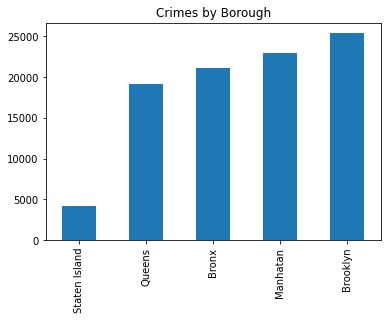

In [49]:
df['ARREST_BORO'].value_counts().sort_values().plot(kind='bar',title='Crimes by Borough')

3.5 Crimes by Race

In [50]:
df.PERP_RACE.value_counts()

BLACK                             45976
WHITE HISPANIC                    23307
WHITE                              9925
BLACK HISPANIC                     8179
ASIAN / PACIFIC ISLANDER           4978
UNKNOWN                             330
AMERICAN INDIAN/ALASKAN NATIVE      239
Name: PERP_RACE, dtype: int64

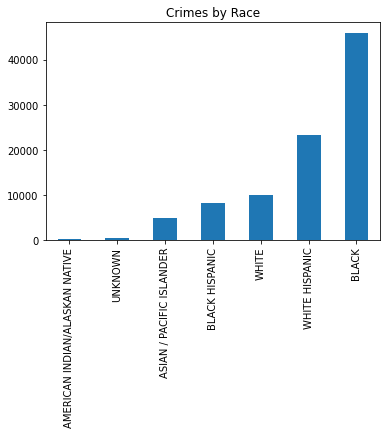

In [51]:
df['PERP_RACE'].value_counts().sort_values().plot(kind='bar',title='Crimes by Race')

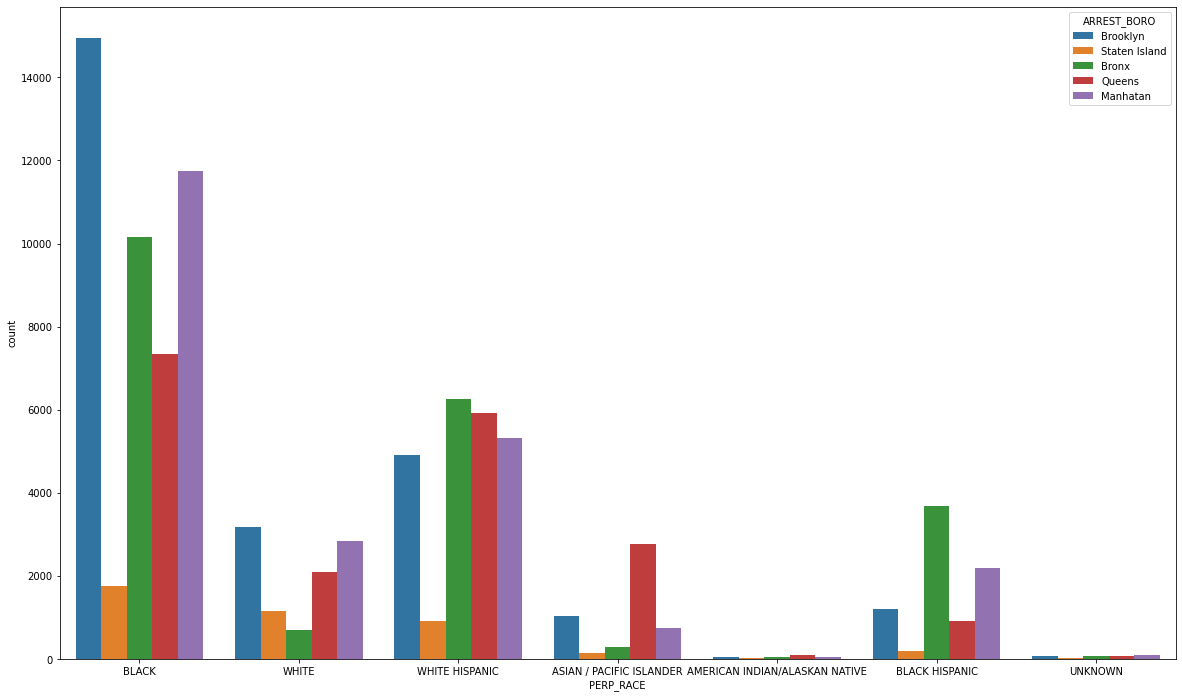

In [52]:
plt.figure(figsize=(20,12))
p=sns.countplot(x=df.PERP_RACE,hue=df.ARREST_BORO)


# 4.Insights

Doing this analysis l focused on the crimes overall in different boroughs, race group and level of offense.We can also analyse the data focusing on a specific type of offense or age group. 

Results:

* Assault & Related Offenses is the most popular offense,15402 arrests, followed by Petit Larceny and Felony
*   54% of offenses were clasified as Misdemeanors, 45% as Felonies, the rest V=Violations or Unknown
*   Brooklyn is the borough with the highest number of arrests, 25404 in the past 6 months; followed by Manhatan 22981 arrests and Bronx 21176 arrests.
*   Black people tend to get arrested more overall and with the highest number in Brooklyn, followed by Manhattan and Bronx. White people are more arrested in Brookyn, White Hispanic in Bronx and Asian in Queens









End of this Notebook